<a href="https://colab.research.google.com/github/ang-bill/IU-DLMDSME01-Credit-Card-Fraud-Detection/blob/main/Task1_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section I. Retrieve Dataset from Kaggle Hub
At the first run, the dataset is downloaded from Kaggle and stored locally. Subsequent runs check whether the file already exists.
See: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data


In [63]:
import os
import pandas as pd # Pandas dataframe
import kagglehub # Kagglehub to access dataset
import shutil # Util for copying files
from google.colab import drive # Import Google Drive utilities

# Mount Google Drive for persistent storage
drive.mount('/content/drive')
local_storage_base_dir = "/content/drive/MyDrive/Colab_Kaggle_Data"

# Dataset details
kaggle_dataset_id = "mlg-ulb/creditcardfraud"
file_name_in_dataset = "creditcard.csv"

# Construct the full path to locally stored dataset
local_dataset_dir = os.path.join(local_storage_base_dir, *kaggle_dataset_id.split('/'))
full_local_file_path = os.path.join(local_dataset_dir, file_name_in_dataset)

# Ensure the desired local storage directory exists
os.makedirs(local_dataset_dir, exist_ok=True)

df = None # Initialize pandas df

# Check if the file already exists in local storage, otherwise download from Kaggle
if os.path.exists(full_local_file_path):
    print(f"'{file_name_in_dataset}' found locally at '{full_local_file_path}'. Loading from there.")
else:
    print(f"'{file_name_in_dataset}' not found locally. Attempting to download from KaggleHub and store it.")

    # Use kagglehub.dataset_download to get the dataset.
    downloaded_source_root = kagglehub.dataset_download(kaggle_dataset_id)

    # Construct the path to the file within the KaggleHub download location
    source_file_path = os.path.join(downloaded_source_root, file_name_in_dataset)

    if os.path.exists(source_file_path):
        print(f"Dataset found at KaggleHub resolved location: '{source_file_path}'.")
        print(f"Copying '{file_name_in_dataset}' to local path: '{full_local_file_path}'.")

        # Copy the file to local storage location
        shutil.copy(source_file_path, full_local_file_path)

    else:
        raise FileNotFoundError(f"Failed to find '{file_name_in_dataset}' at source '{source_file_path}' after KaggleHub download resolution.")

# Load the dataset into a pandas dataframe
df = pd.read_csv(full_local_file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'creditcard.csv' found locally at '/content/drive/MyDrive/Colab_Kaggle_Data/mlg-ulb/creditcardfraud/creditcard.csv'. Loading from there.


# Section II. Exploratory Data Analysis

## 1. Quick inspection of contents

In [50]:
from IPython.display import display

# Output number of rows and columns
num_rows, num_columns = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Display first records
print("\nFirst 5 records:")
display(df.head())


Number of rows: 284807
Number of columns: 31

First 5 records:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Exploration of dataset columns
Per feature:
*   Name
*   Datatype
*   Missing values
*   Min, max, mean
*   Distribution (including indication of mean)



,Feature,Statistics 1,Statistics 2,Statistics 3,Distribution,Transformed Distribution
0,Time,Datatype: float64Missing: 0Mean: 94813.86,Min: 0.0025th Perc.: 54201.50Mean: 94813.8675th Perc.: 139320.50Max: 172792.00,Skew: -0.04Median: 84692.00Mode: 163152.00Kurtosis: -1.29,,
1,V1,Datatype: float64Missing: 0Mean: 0.00,Min: -56.4125th Perc.: -0.92Mean: 0.0075th Perc.: 1.32Max: 2.45,Skew: -3.28Median: 0.02Mode: 1.25Kurtosis: 32.49,,
2,V2,Datatype: float64Missing: 0Mean: 0.00,Min: -72.7225th Perc.: -0.60Mean: 0.0075th Perc.: 0.80Max: 22.06,Skew: -4.62Median: 0.07Mode: -0.33Kurtosis: 95.77,,
3,V3,Datatype: float64Missing: 0Mean: -0.00,Min: -48.3325th Perc.: -0.89Mean: -0.0075th Perc.: 1.03Max: 9.38,Skew: -2.24Median: 0.18Mode: -2.75Kurtosis: 26.62,,
4,V4,Datatype: float64Missing: 0Mean: 0.00,Min: -5.6825th Perc.: -0.85Mean: 0.0075th Perc.: 0.74Max: 16.88,Skew: 0.68Median: -0.02Mode: -0.84Kurtosis: 2.64,,
5,V5,Datatype: float64Missing: 0Mean: 0.00,Min: -113.7425th Perc.: -0.69Mean: 0.0075th Perc.: 0.61Max: 34.80,Skew: -2.43Median: -0.05Mode: -0.56Kurtosis: 206.90,,
6,V6,Datatype: float64Missing: 0Mean: 0.00,Min: -26.1625th Perc.: -0.77Mean: 0.0075th Perc.: 0.40Max: 73.30,Skew: 1.83Median: -0.27Mode: -1.01Kurtosis: 42.64,,
7,V7,Datatype: float64Missing: 0Mean: -0.00,Min: -43.5625th Perc.: -0.55Mean: -0.0075th Perc.: 0.57Max: 120.59,Skew: 2.55Median: 0.04Mode: -0.43Kurtosis: 405.61,,
8,V8,Datatype: float64Missing: 0Mean: 0.00,Min: -73.2225th Perc.: -0.21Mean: 0.0075th Perc.: 0.33Max: 20.01,Skew: -8.52Median: 0.02Mode: -0.16Kurtosis: 220.59,,
9,V9,Datatype: float64Missing: 0Mean: -0.00,Min: -13.4325th Perc.: -0.64Mean: -0.0075th Perc.: 0.60Max: 15.59,Skew: 0.55Median: -0.05Mode: 0.17Kurtosis: 3.73,,

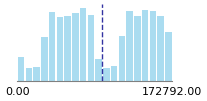
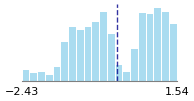
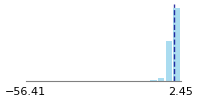
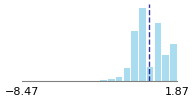
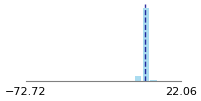
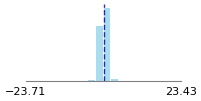
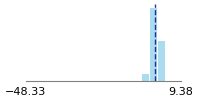
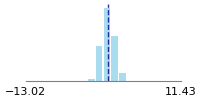
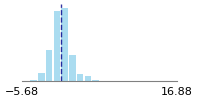
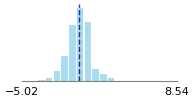
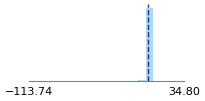
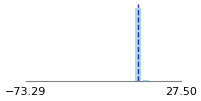
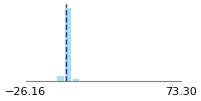
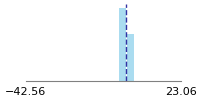
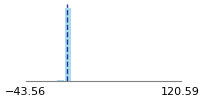
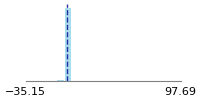
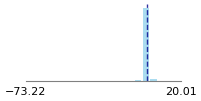
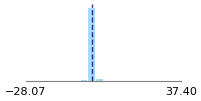
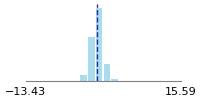
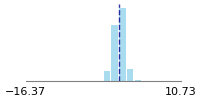
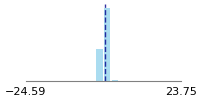
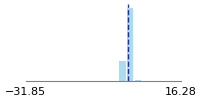
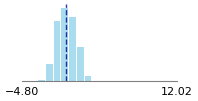
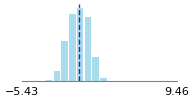
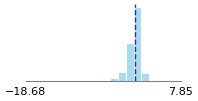
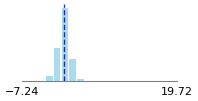
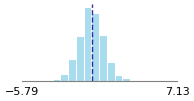
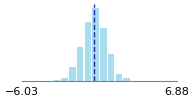
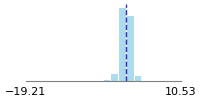
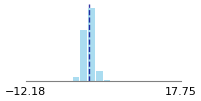
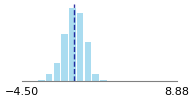
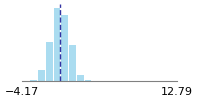
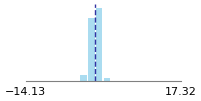
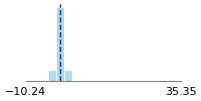
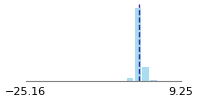
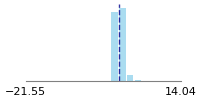
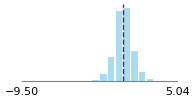
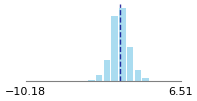
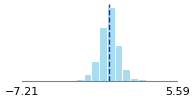
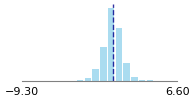
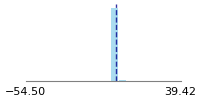
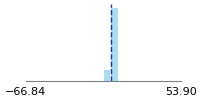
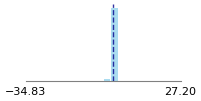
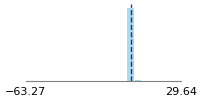
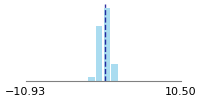
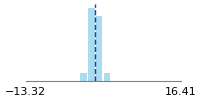
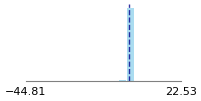
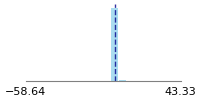
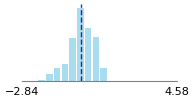
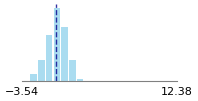
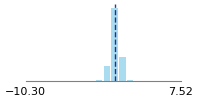
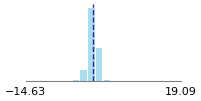
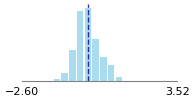
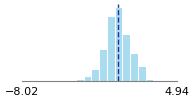
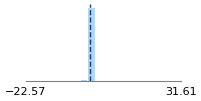
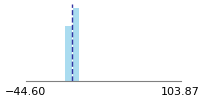
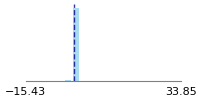
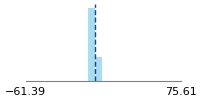
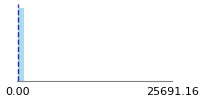
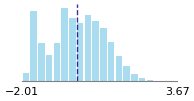
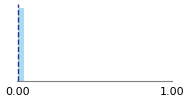
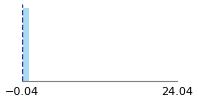
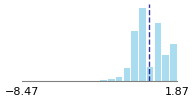
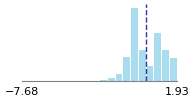

In [62]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import PowerTransformer
import io
import base64

def create_mini_histogram(data_series):
    if not np.issubdtype(data_series.dtype, np.number) or data_series.isnull().all():
        return "N/A"

    # Use a small figure size for a miniature histogram
    fig, ax = plt.subplots(figsize=(2, 1), dpi=100) # Width, Height in inches
    ax.hist(data_series.dropna(), bins=20, color='skyblue', alpha=0.7, rwidth=0.85)

    # Set x-axis limits to min and max of the data
    min_val = data_series.min()
    max_val = data_series.max()
    mean_val = data_series.mean()
    ax.set_xlim(min_val, max_val)

    # Styling
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('grey')
    # ax.set_xticks([min_val, mean_val, max_val])
    ax.set_xticks([min_val, max_val])
    ax.axvline(x=mean_val, color='darkblue', linestyle='--', linewidth=1, alpha=0.8)
    ax.set_yticks([])
    ax.tick_params(axis='x', labelsize=8, length=0, color='grey')
    formatter = ticker.StrMethodFormatter('{x:.2f}')
    ax.xaxis.set_major_formatter(formatter)

    # Save plot to a BytesIO object
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0.05)
    buf.seek(0)
    plt.close(fig)

    # Encode to base64 and return as HTML img tag
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{img_str}" style="height:100px;">'

formatted_summary_data = []

for column in df.columns:
    data_series = df[column]
    datatype = data_series.dtype
    missing_values = data_series.isnull().sum()
    #missing_percentage = (missing_values / len(df)) * 100
    desc = data_series.describe()

    statistics_1 = [
        f"Datatype: {str(datatype)}",
        #f"Missing: {missing_values} ({missing_percentage:.2f}%)"
        f"Missing: {missing_values}",
        f"Mean: {desc.get('mean', np.nan):.2f}"
    ]
    statistics_2 = [
        f"Min: {desc.get('min', np.nan):.2f}",
        f"25th Perc.: {desc.get('25%', np.nan):.2f}",
        f"Mean: {desc.get('mean', np.nan):.2f}",
        f"75th Perc.: {desc.get('75%', np.nan):.2f}",
        f"Max: {desc.get('max', np.nan):.2f}",
    ]
    statistics_3 = [
        f"Skew: {data_series.skew():.2f}",
        f"Median: {data_series.median():.2f}",
        f"Mode: {data_series.mode()[0]:.2f}",
        f"Kurtosis: {data_series.kurtosis():.2f}"
    ]

    #min_val = desc.get('min', np.nan)
    #max_val = desc.get('max', np.nan)
    #mean_val = desc.get('mean', np.nan)
    #std_val = desc.get('std', np.nan)


    # Format numeric values to 2 decimal places for consistency, handling NaN
    #statistics_lines.append(f"Min: {min_val:.2f}" if not pd.isna(min_val) else "Min: NaN")
    #statistics_lines.append(f"Max: {max_val:.2f}" if not pd.isna(max_val) else "Max: NaN")
    #statistics_1.append(f"Mean: {mean_val:.2f}" if not pd.isna(mean_val) else "Mean: NaN")
    #statistics_lines.append(f"Std Dev: {std_val:.2f}" if not pd.isna(std_val) else "Std Dev: NaN")

    distribution_html = create_mini_histogram(df[column])
    #log1p_distribution_html = create_mini_histogram(np.log1p(df[column]))

    # Transform with 'yeo-johnson' to enhance visualisation of skewed distributions
    pt = PowerTransformer(method='yeo-johnson', standardize=True)
    s = pt.fit_transform(df[[column]])
    ps = pd.Series(s.flatten())
    yeojohnson_distribution_html = create_mini_histogram(ps)


    formatted_summary_data.append({
        'Feature': column,
        'Statistics 1': "<br>".join(statistics_1),
        'Statistics 2': "<br>".join(statistics_2),
        'Statistics 3': "<br>".join(statistics_3),
        'Distribution': distribution_html,
        'Yeo-Johnson Transformed': yeojohnson_distribution_html
    })

# Display dataframe as HTML
summary_df_formatted = pd.DataFrame(formatted_summary_data)
display(HTML(summary_df_formatted.to_html(escape=False)))


## 3. Exploration of class imbalance
The column "Class" of the dataset holds the label:

*   **1**: Fraud transaction
*   **0**: Legit transaction





In [42]:
import pandas as pd
from IPython.display import display, HTML

# Define the expected classes and their corresponding names
expected_classes_map = {0: 'Legit transactions', 1: 'Fraud transactions'}

# Calculate the count and percentage of each class
class_counts = df['Class'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

# Create pandas DataFrame to output table
class_imbalance_df = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages
})

# Formatting and additional columns
class_imbalance_df = class_imbalance_df.reset_index() # Make 'Class' (codification) a column
class_imbalance_df = class_imbalance_df.rename(columns={'Class': 'Codification'}) # Corrected from 'index' to 'Class'
class_imbalance_df['Class'] = class_imbalance_df['Codification'].map(expected_classes_map)
class_imbalance_df['Count'] = class_imbalance_df['Count'].map('{:,.0f}'.format)
class_imbalance_df['Percentage'] = class_imbalance_df['Percentage'].map('{:.3f}%'.format)

# Display the table
class_imbalance_df = class_imbalance_df[['Class', 'Codification', 'Count', 'Percentage']]
display(HTML(class_imbalance_df.to_html(index=False)))


Class,Codification,Count,Percentage
Legit transactions,0,"284,315",99.827%
Fraud transactions,1,492,0.173%


## 4. Correlation Matrix

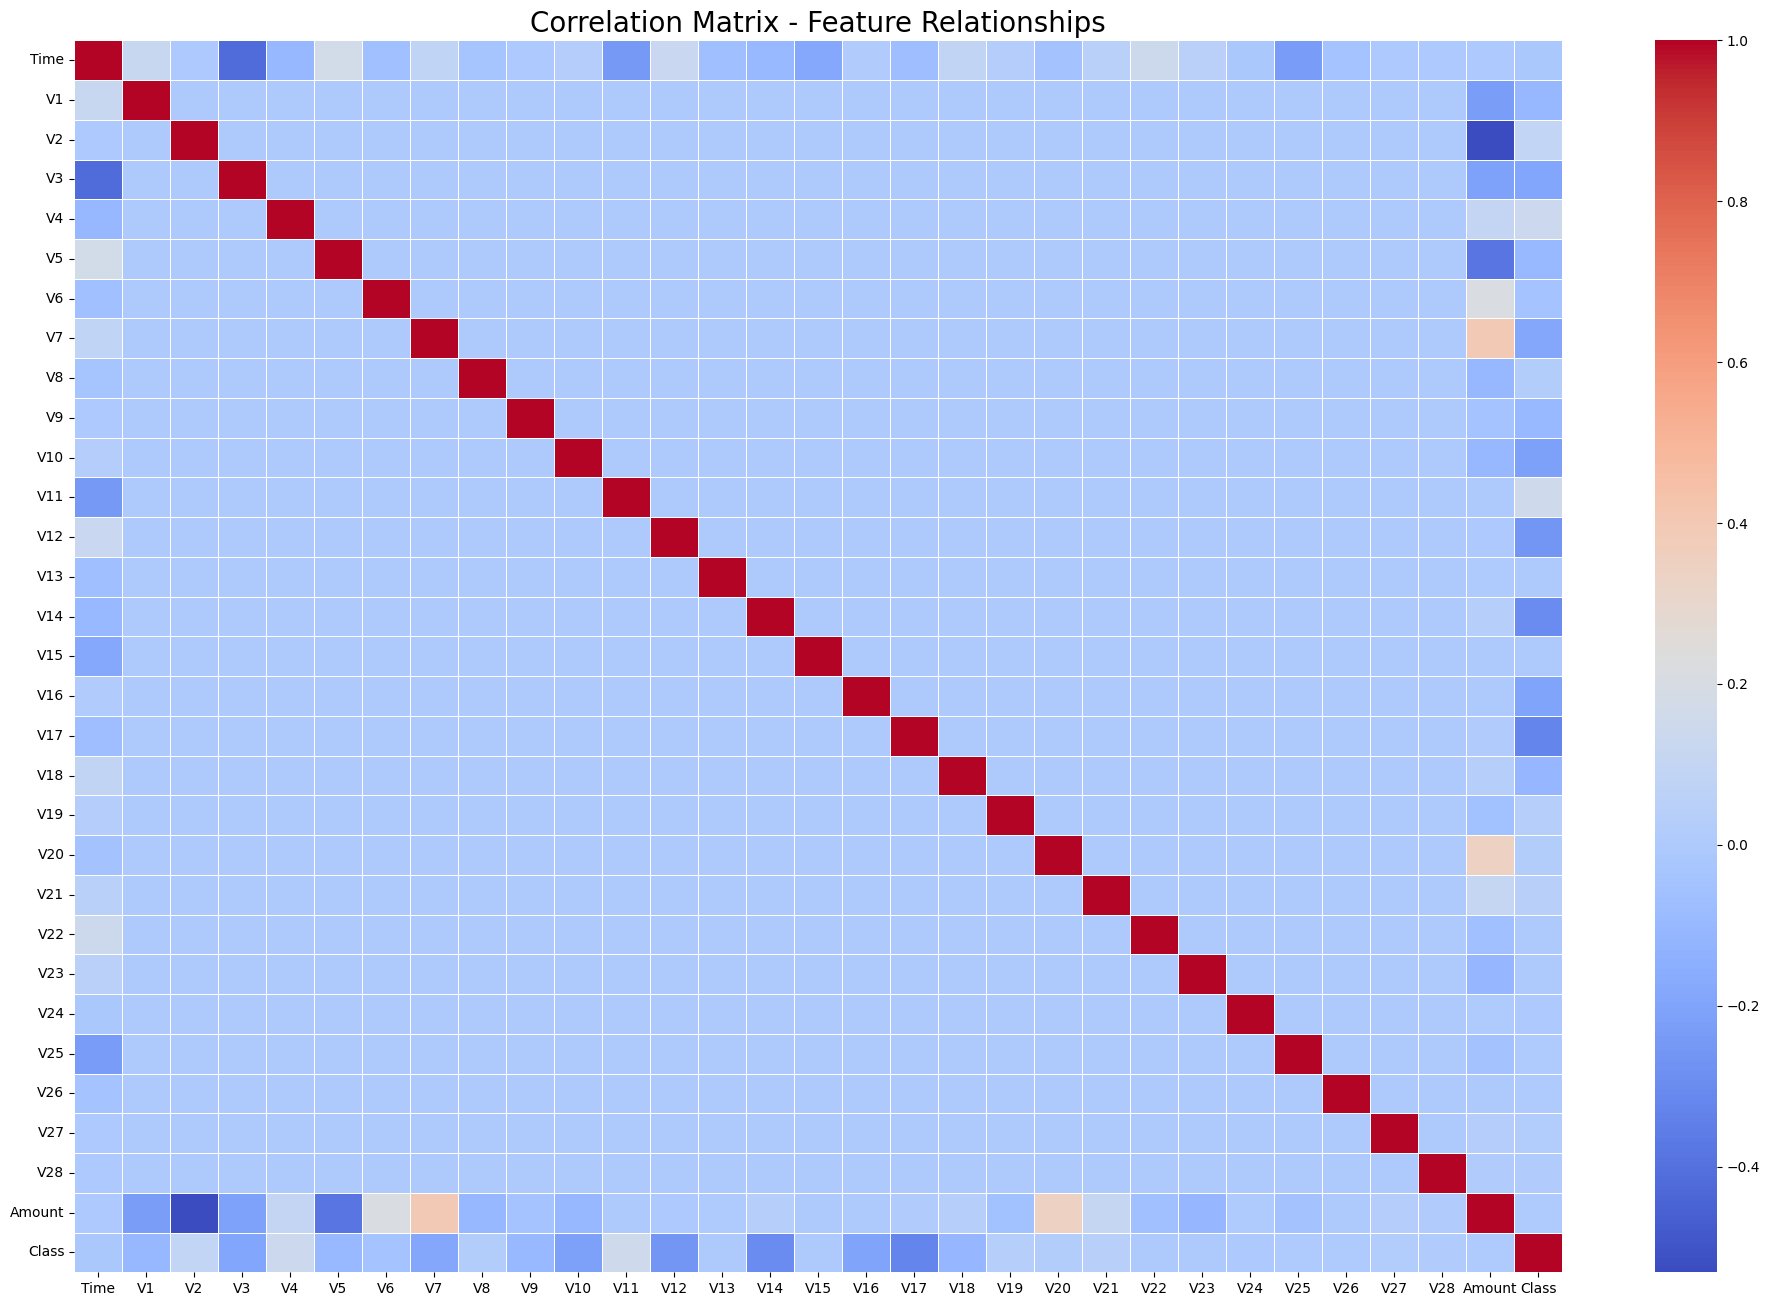

Top 5 Positively Correlated Features (Fraud indicators):
V11    0.154876
V4     0.133447
V2     0.091289
V21    0.040413
V19    0.034783
Name: Class, dtype: float64

Top 5 Negatively Correlated Features (Fraud indicators):
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


In [55]:
# Calculate the correlation of all features
corr_matrix = df.corr()

# Plot the correlation matrix as heatmap
plt.figure(figsize=(24, 16))
plt.title('Correlation Matrix - Feature Relationships', fontsize=20)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.show()

# Filter the correlations with 'Class'
# and list the top 5 positive / negatively correlated features
class_corr = corr_matrix['Class'].sort_values(ascending=False)
print("Top 5 Positively Correlated Features (Fraud indicators):")
print(class_corr.head(6)[1:]) # Skip the first one (Class vs Class)
print("\nTop 5 Negatively Correlated Features (Fraud indicators):")
print(class_corr.tail(5))

# Testing

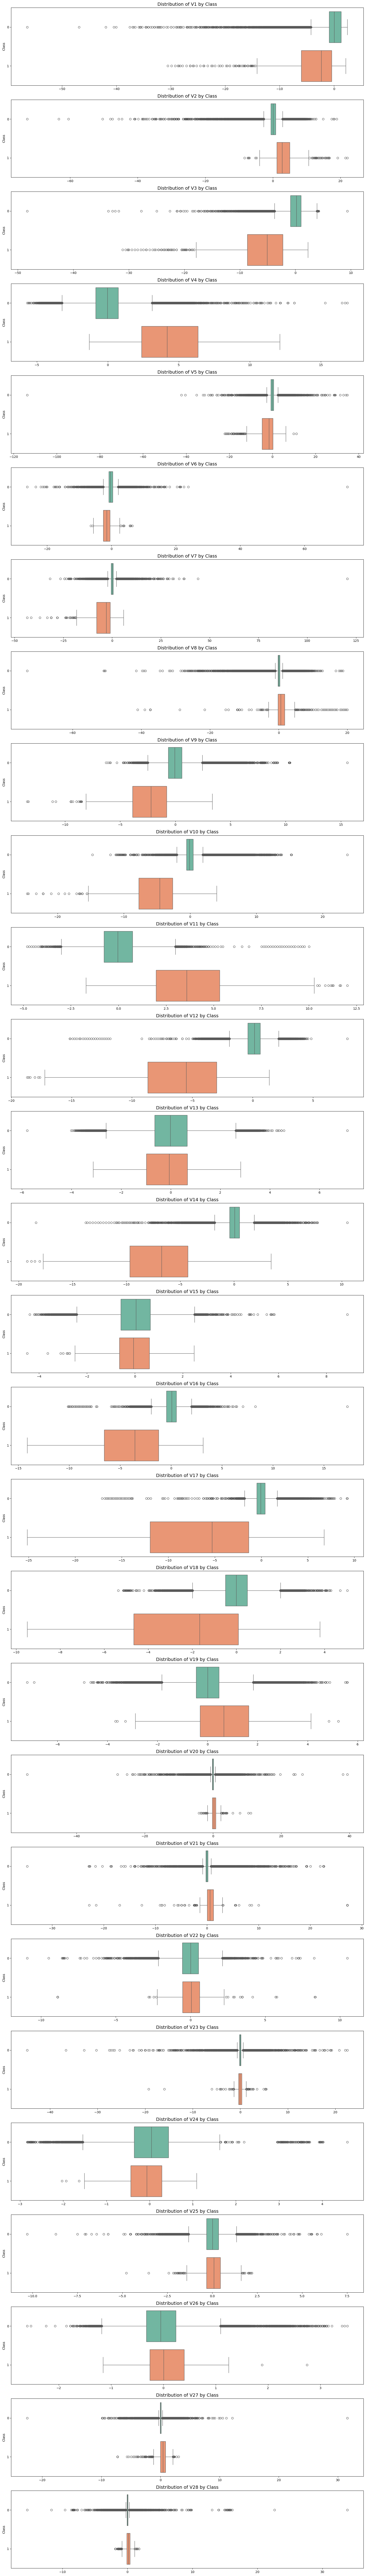

In [65]:
# --- 5. Visualizing Outliers (Box Plots) ---

# Select just the V columns
v_features = df.columns[1:29]  # V1 to V28

# Setup the figure size (Width, Height)
plt.figure(figsize=(16, 28*4)) # Tall figure to fit everything clearly
gs = plt.GridSpec(28, 1) # 28 Rows

for i, col in enumerate(v_features):
    ax = plt.subplot(gs[i])

    # Plot the Box Plot for the specific feature, separated by Class
    # This allows you to see if Fraud (1) has different outliers than Normal (0)
    # Fix: Assign y to hue and set legend=False to address FutureWarning
    sns.boxplot(x=df[col], y=df['Class'].astype('category'), hue=df['Class'].astype('category'), ax=ax, palette="Set2", orient="h", legend=False)

    ax.set_title(f'Distribution of {col} by Class', fontsize=14)
    ax.set_xlabel('') # Remove label to save space

plt.tight_layout()
plt.show()

<Axes: xlabel='V1_yeo', ylabel='Count'>

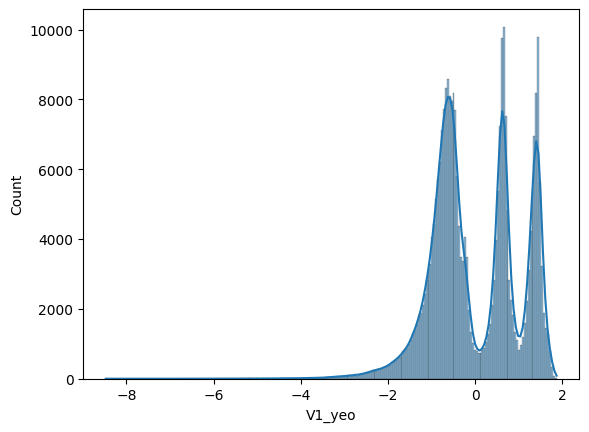

In [56]:
from sklearn.preprocessing import PowerTransformer

# 'yeo-johnson' is the default and handles negative values
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Apply to your skewed column (reshape needed for a single feature)
# Example for V1
df['V1_yeo'] = pt.fit_transform(df[['V1']])

# Visual check
sns.histplot(df['V1_yeo'], kde=True)

### Visualization of the 'Amount' Feature

The 'Amount' feature often exhibits a highly skewed distribution in transactional datasets, with many small transactions and a few very large ones. This makes it challenging to visualize effectively with a standard histogram, as most data points get compressed into a few bins near zero. We'll explore a few visualization techniques to get a better understanding.

Descriptive Statistics for 'Amount':



,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


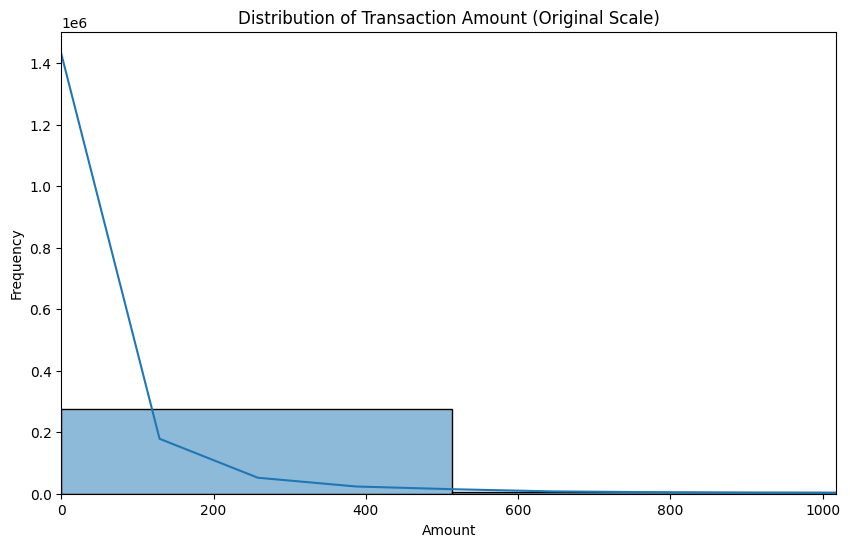

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Display descriptive statistics for 'Amount'
print("Descriptive Statistics for 'Amount':\n")
display(df['Amount'].describe())

# Plot a standard histogram of 'Amount'
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount (Original Scale)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(0, df['Amount'].quantile(0.99))
plt.show()

As you can see from the standard histogram, most of the data is concentrated near zero, making it hard to discern patterns among smaller amounts. To address this, we can apply a log transformation to the 'Amount' feature (adding a small constant to handle zero values, if any, before taking the logarithm). This compresses the large values and spreads out the smaller values, revealing more details about their distribution.

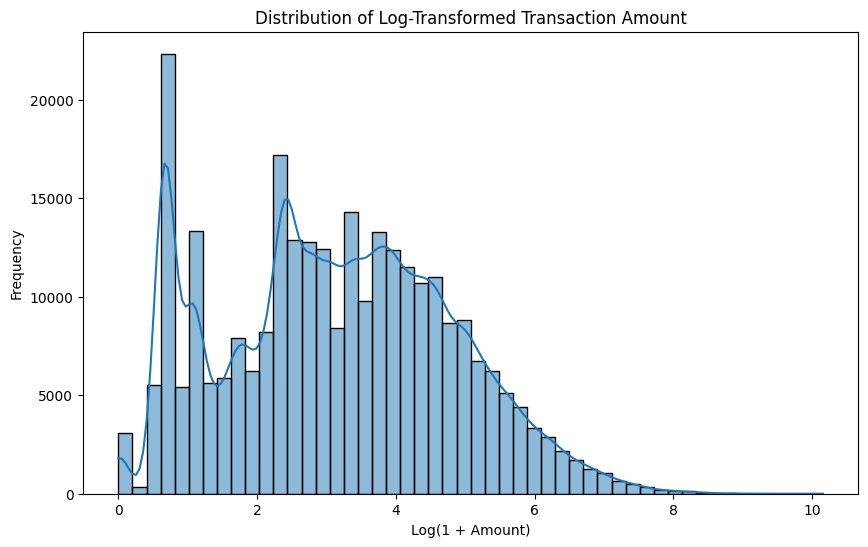

Descriptive Statistics for Log(1 + Amount):



,log_amount
count,284807.000000
mean,3.152188
std,1.656648
min,0.000000
25%,1.887070
50%,3.135494
75%,4.358822
max,10.153941


In [44]:
# Apply a log transformation to 'Amount'
# Add a small constant (e.g., 1) to handle zero amounts before log transformation
df['log_amount'] = np.log1p(df['Amount'])

# Plot a histogram of the log-transformed 'Amount'
plt.figure(figsize=(10, 6))
sns.histplot(df['log_amount'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Transaction Amount')
plt.xlabel('Log(1 + Amount)')
plt.ylabel('Frequency')
plt.show()

# Also display descriptive statistics for log_amount
print("Descriptive Statistics for Log(1 + Amount):\n")
display(df['log_amount'].describe())

A box plot can further illustrate the spread of the data and clearly show outliers, which are common in 'Amount' features.

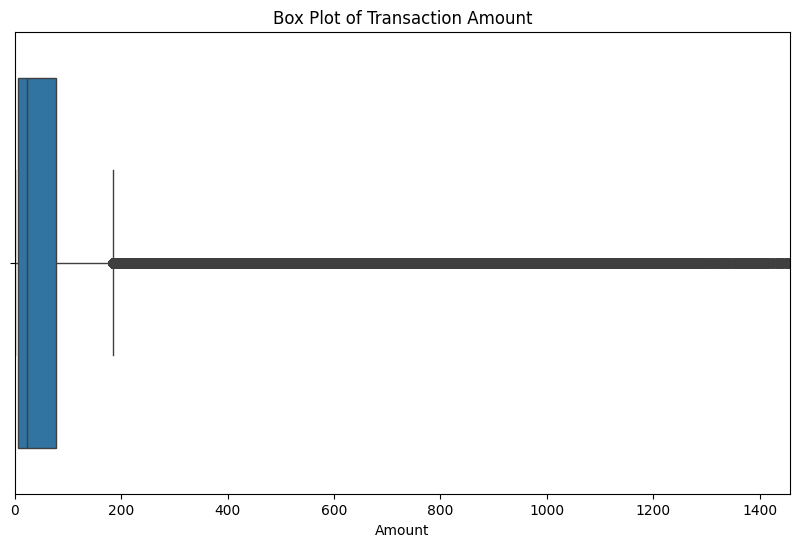

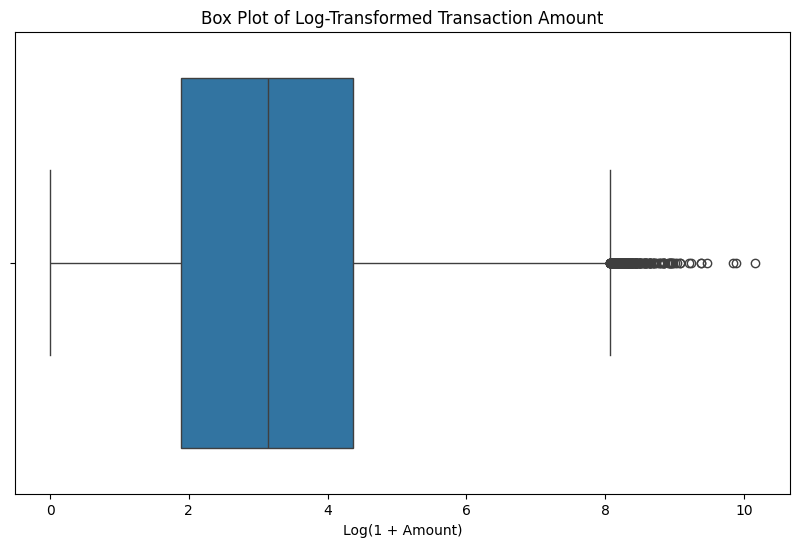

In [45]:
# Plot a box plot for 'Amount' to visualize spread and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Amount')
plt.xlim(0, df['Amount'].quantile(0.995)) # Limit x-axis to show most of the data without extreme outliers
plt.show()

# Box plot for log_amount to see distribution without extreme outliers dominating
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_amount'])
plt.title('Box Plot of Log-Transformed Transaction Amount')
plt.xlabel('Log(1 + Amount)')
plt.show()